In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib

df = pd.read_csv("healthexp.csv", sep=",")
result_axes = df.groupby('Year').first() # First register for each year.
result_axes.head()

,Country,Spending_USD,Life_Expectancy
Year,,,
1970,Germany,252.311,70.6
1971,Canada,313.391,72.8
1972,Germany,337.364,71.0
1973,Germany,384.541,71.3
1974,Germany,452.744,71.5


array([<Axes: xlabel='Year'>, <Axes: xlabel='Year'>], dtype=object)

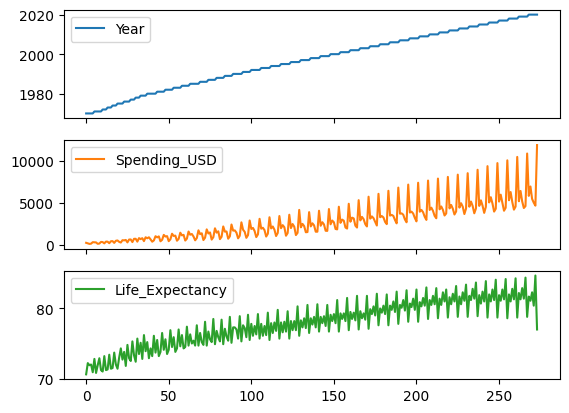

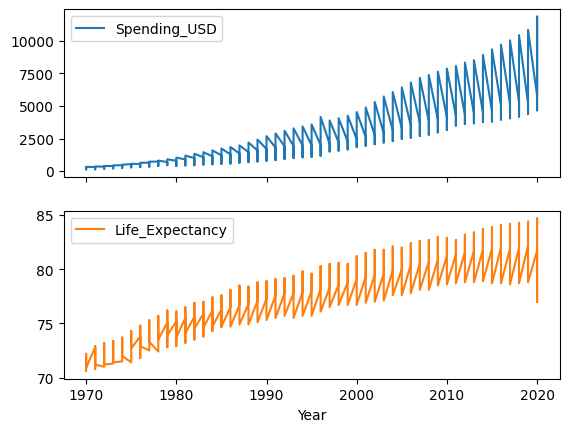

In [57]:
df.plot(kind="line", subplots=True)
df.plot(kind="line", subplots=True, x="Year")

<Axes: title={'center': 'Isolated'}, xlabel='Year'>

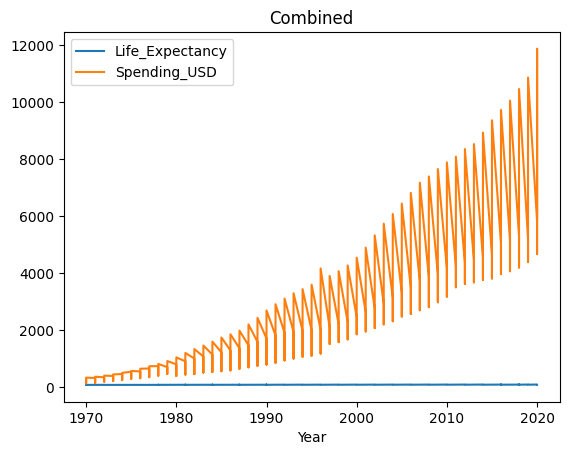

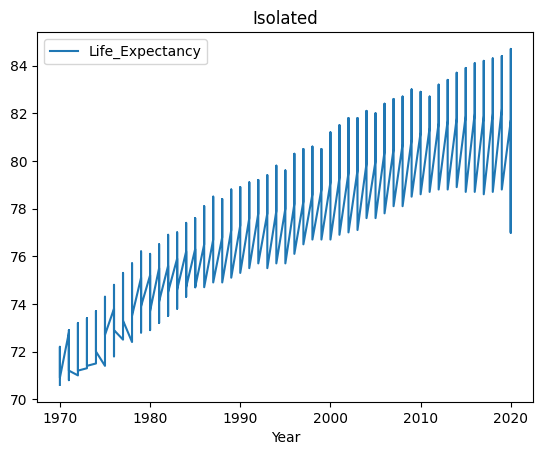

In [34]:
# It may not be a good idea to plot Life_Expectancy and Spending_USD 
# togheter because their values ​​are too discrepant.
df.plot(kind="line", subplots=False, x="Year", y=["Life_Expectancy", "Spending_USD"], title="Combined")
# df.plot.line(subplots=False, x="Year", y=["Spending_USD"]) # No title= parameter.
df.plot(kind="line", subplots=False, x="Year", y=["Life_Expectancy"], title="Isolated")

<Axes: >

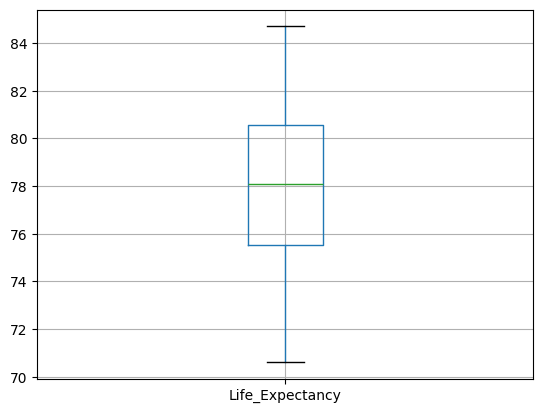

In [44]:
df.boxplot(column=["Life_Expectancy"])

<Axes: >

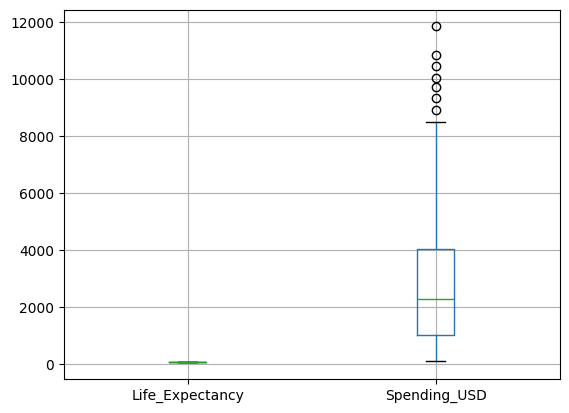

In [45]:
df.boxplot(column=["Life_Expectancy", "Spending_USD"])

<Axes: xlabel='Year'>

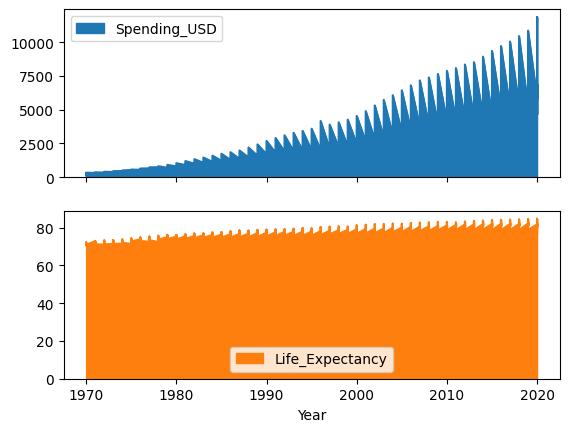

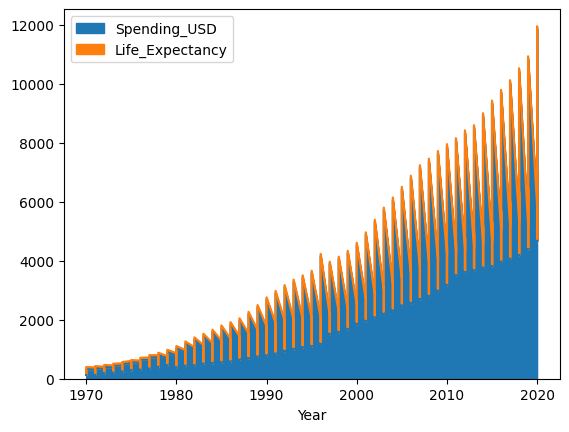

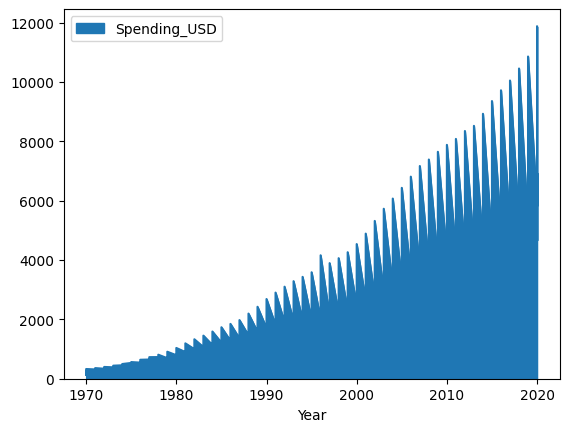

In [55]:
df.plot.area(x="Year", subplots=True)
df.plot.area(x="Year", subplots=False)
df.plot.area(x="Year", y="Spending_USD")

[[<Axes: title={'center': 'Year'}>
  <Axes: title={'center': 'Spending_USD'}>]
 [<Axes: title={'center': 'Life_Expectancy'}> <Axes: >]]


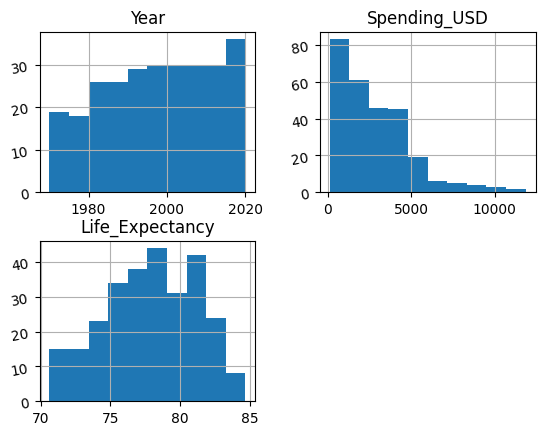

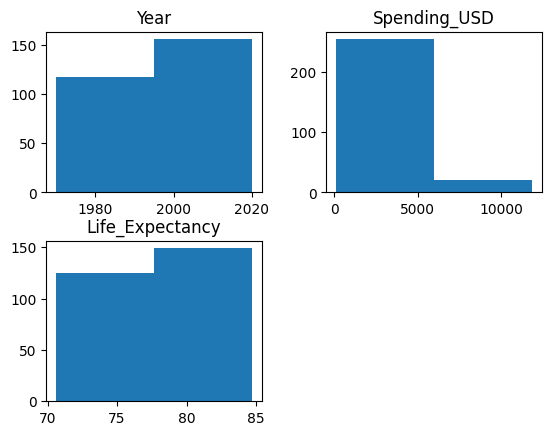

In [123]:
plt.ioff()
ax = df.hist(bins=10, grid=True, yrot=10) # xrot and yrot: rotation
print(ax)

df.hist(bins=2, grid=False)

plt.show()

In [126]:
df.sort_values(by="Country").groupby('Country')["Spending_USD"].describe()

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Canada,44.0,2685.778341,1526.252453,313.391,1435.33825,2239.361,3998.28700,5828.324
France,35.0,3045.145057,1468.282187,192.143,1958.98000,3152.016,4230.56600,5468.418
Germany,50.0,2667.280200,1873.356162,252.311,1059.54450,2414.681,3904.04875,6938.983
Great Britain,43.0,2034.192465,1433.797586,123.993,713.88150,1683.905,3388.10800,5018.700
Japan,51.0,1860.257902,1467.225806,150.437,689.81700,1420.271,2744.55700,4665.641
USA,51.0,4388.570529,3386.309322,326.961,1390.80700,3586.745,7275.76950,11859.179


In [14]:
df.groupby('Country')['Spending_USD'].sum()

Country
Canada           118174.247
France           106580.077
Germany          133364.010
Great Britain     87470.276
Japan             94873.153
USA              223817.097
Name: Spending_USD, dtype: float64

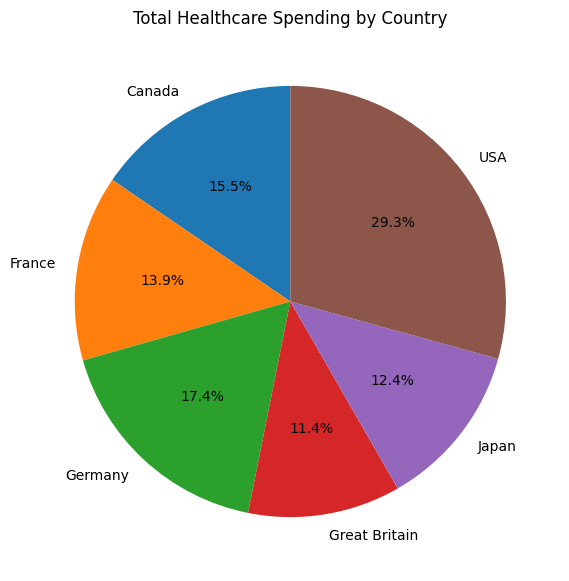

In [19]:
plt.ioff()

total_spending_per_country = df.groupby('Country')['Spending_USD'].sum()

fig, ax = plt.subplots(figsize=(10, 7))
ax.pie(total_spending_per_country, labels=total_spending_per_country.index, autopct='%1.1f%%', startangle=90)
ax.set_title('Total Healthcare Spending by Country')

plt.show()

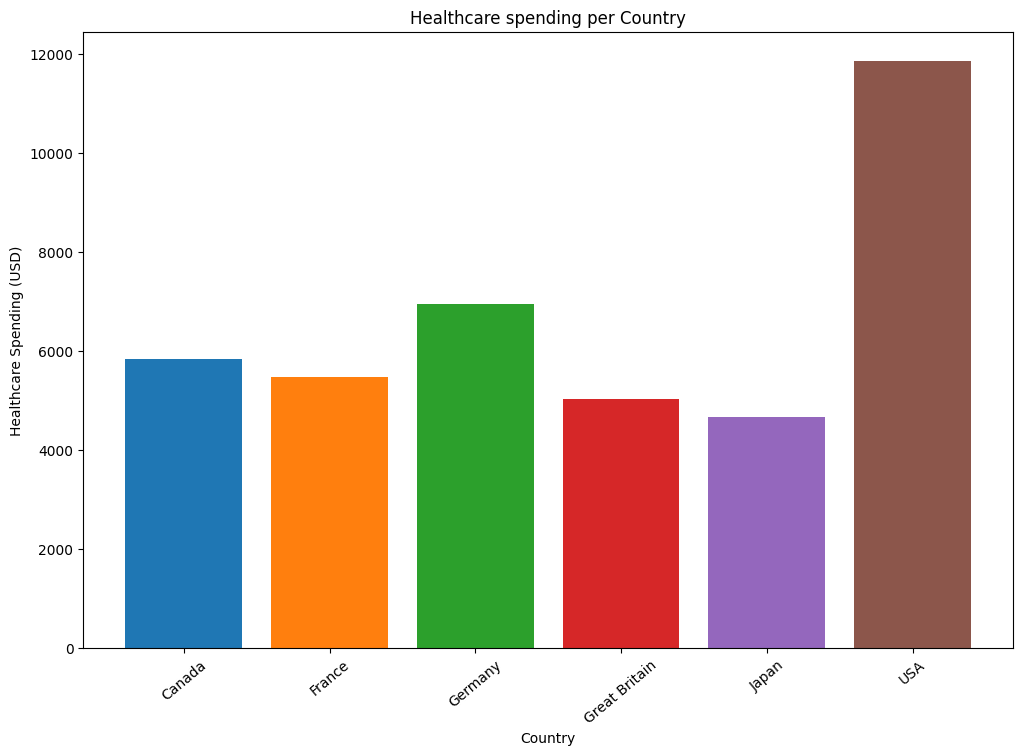

In [79]:
plt.ioff()

fig, ax = plt.subplots(figsize=(12, 8))

for country, group in df.groupby("Country"):
    # print(country, group["Spending_USD"][:2])
    # It doesn't make sense to use label=country because the x axis already has each country name.
    ax.bar(country, group["Spending_USD"]) 

ax.set_xlabel("Country")
ax.set_ylabel("Healthcare Spending (USD)")
ax.set_title("Healthcare spending per Country")
# ax.legend(title="Country") # No place for legend for the same reason stated above.
plt.xticks(rotation=40)

plt.show()

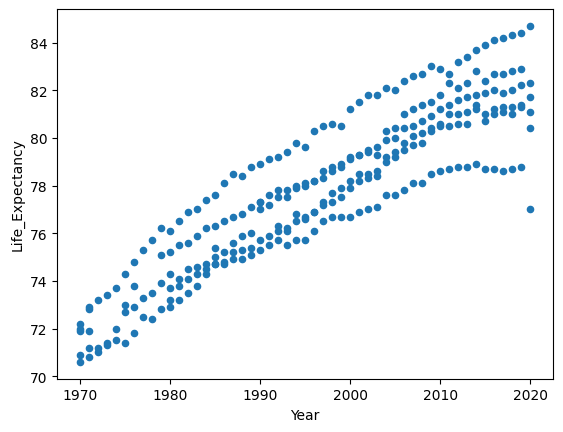

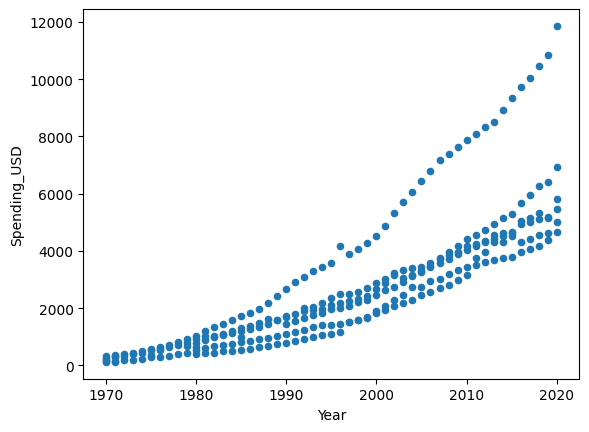

In [119]:
plt.ioff()
df.plot.scatter(x="Year", y="Life_Expectancy")
df.plot.scatter(x="Year", y="Spending_USD")
plt.show()

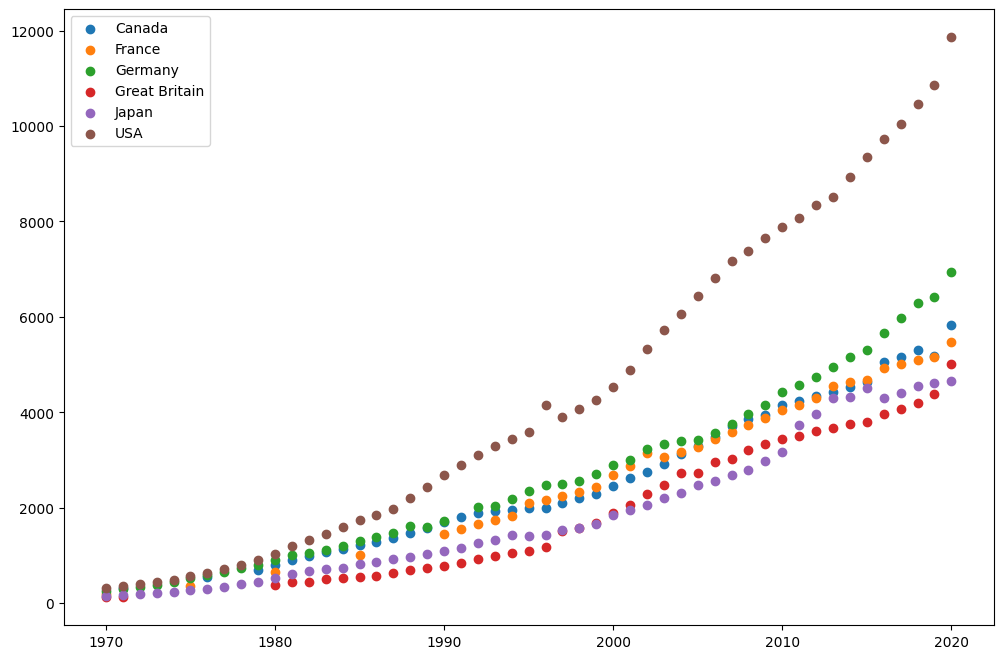

In [132]:
plt.ioff()

fig, ax = plt.subplots(figsize=(12, 8))

for country, group in df.groupby("Country"):
    ax.scatter(group["Year"], group["Spending_USD"], label=country)

ax.legend()

plt.show()

In [82]:
grouped = df.groupby(["Country", "Year"])

for (country, year), group in grouped:
    print(f"Country: {country}, Year: {year}")
    print(group)


Country: Canada, Year: 1971
   Year Country  Spending_USD  Life_Expectancy
5  1971  Canada       313.391             72.8
Country: Canada, Year: 1976
    Year Country  Spending_USD  Life_Expectancy
23  1976  Canada       543.337             73.8
Country: Canada, Year: 1979
    Year Country  Spending_USD  Life_Expectancy
33  1979  Canada       692.269             75.1
Country: Canada, Year: 1980
    Year Country  Spending_USD  Life_Expectancy
37  1980  Canada       791.812             75.2
Country: Canada, Year: 1981
    Year Country  Spending_USD  Life_Expectancy
43  1981  Canada       898.807             75.5
Country: Canada, Year: 1982
    Year Country  Spending_USD  Life_Expectancy
48  1982  Canada       996.086             75.6
Country: Canada, Year: 1983
    Year Country  Spending_USD  Life_Expectancy
53  1983  Canada      1066.746             75.9
Country: Canada, Year: 1984
    Year Country  Spending_USD  Life_Expectancy
58  1984  Canada       1135.02             76.2
Country: C

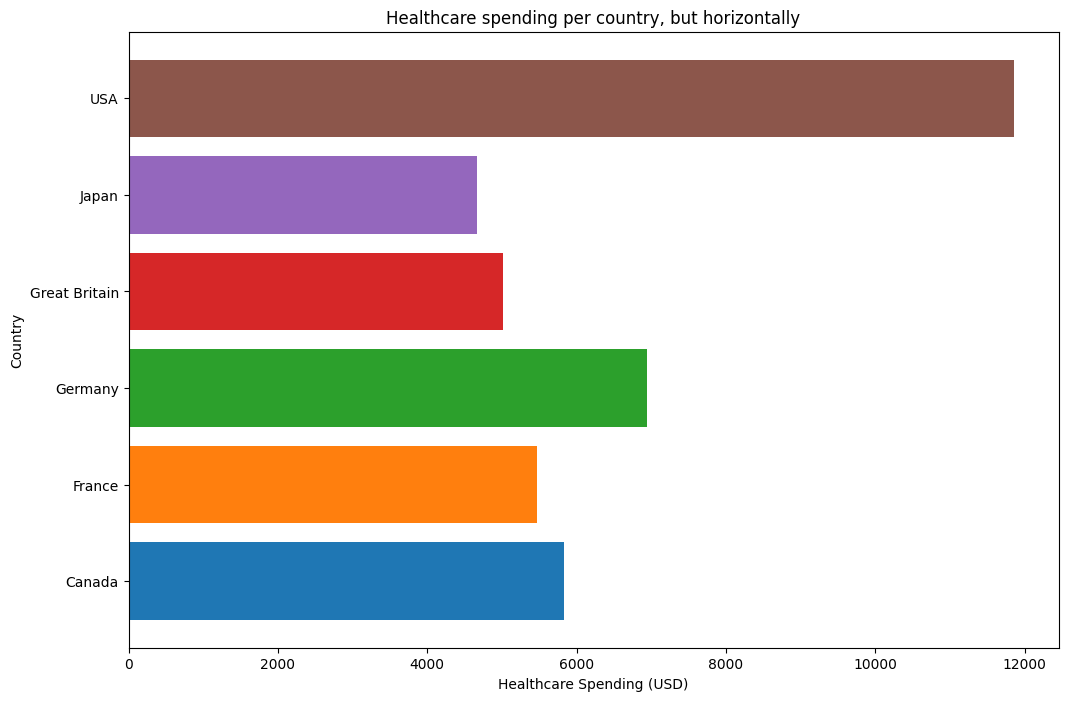

In [55]:
plt.ioff()

fig, ax = plt.subplots(figsize=(12, 8))

for country, group in df.groupby("Country"):
    ax.barh(country, group["Spending_USD"]) # x and y places are reversed for barh().

ax.set_xlabel("Healthcare Spending (USD)")
ax.set_ylabel("Country")
ax.set_title("Healthcare spending per country, but horizontally")

plt.show()

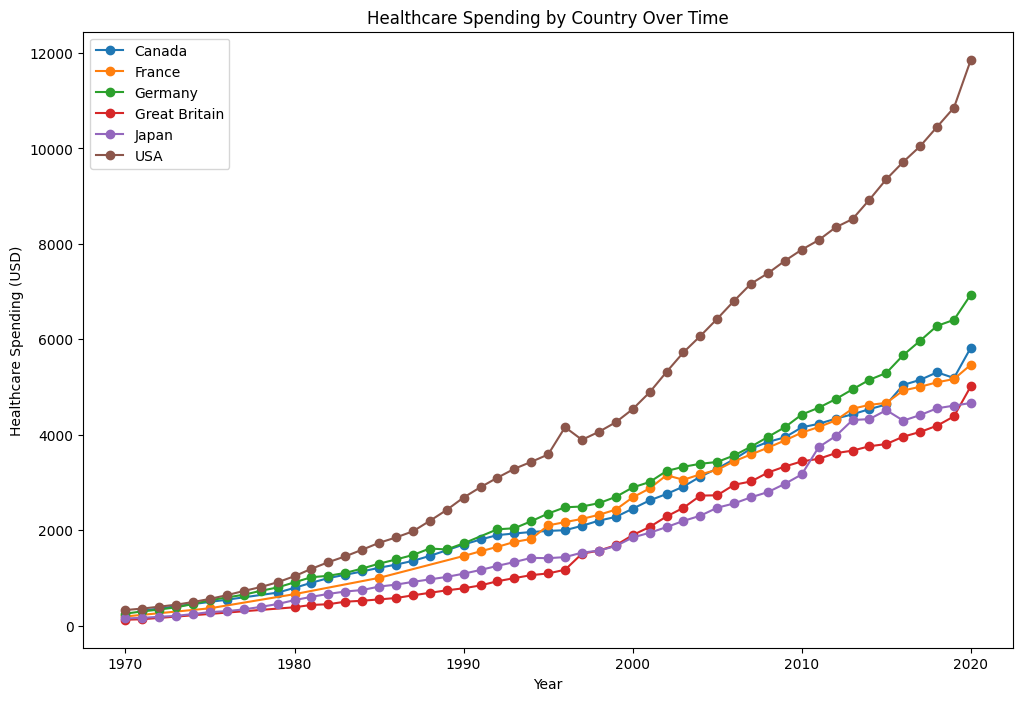

In [15]:
plt.ioff() # Prevents notebook from dislaying the plots eagerly.

fig, ax = plt.subplots(figsize=(12, 8))

# Group by country and plot each country's data
for country, group in df.groupby('Country'):
    ax.plot(group['Year'], group['Spending_USD'], marker='o', label=country)

ax.set_xlabel('Year')
ax.set_ylabel('Healthcare Spending (USD)')
ax.set_title('Healthcare Spending by Country Over Time')
ax.legend()

plt.show()